In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [72]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (10, 10), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0247 - accuracy: 0.9920
313/313 - 1s - loss: 0.0337 - accuracy: 0.9900 - 955ms/epoch - 3ms/step


[0.033708833158016205, 0.9900000095367432]

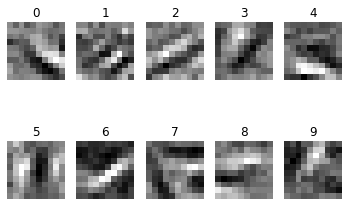

In [75]:
for epoch in range(5):
    model.fit(x_train, y_train, epochs=1)
    #show conv2d filter
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(model.layers[0].get_weights()[0][:,:,0,i], cmap=plt.cm.binary)
        plt.title(i)
        plt.axis('off')
model.evaluate(x_test, y_test, verbose = 2)


313/313 [==============================] - 1s 4ms/step
0
predicted :  7
answer :  7
1
predicted :  2
answer :  2
2
predicted :  1
answer :  1
3
predicted :  0
answer :  0
4
predicted :  4
answer :  4
5
predicted :  1
answer :  1
6
predicted :  4
answer :  4
7
predicted :  9
answer :  9
8
predicted :  5
answer :  5
9
predicted :  9
answer :  9
10
predicted :  0
answer :  0
11
predicted :  6
answer :  6
12
predicted :  9
answer :  9
13
predicted :  0
answer :  0
14
predicted :  1
answer :  1
15
predicted :  5
answer :  5
16
predicted :  9
answer :  9
17
predicted :  7
answer :  7
18
predicted :  3
answer :  3
19
predicted :  4
answer :  4
20
predicted :  9
answer :  9
21
predicted :  6
answer :  6
22
predicted :  6
answer :  6
23
predicted :  5
answer :  5
24
predicted :  4
answer :  4
25
predicted :  0
answer :  0
26
predicted :  7
answer :  7
27
predicted :  4
answer :  4
28
predicted :  0
answer :  0
29
predicted :  1
answer :  1
30
predicted :  3
answer :  3
31
predicted :  1
answer 

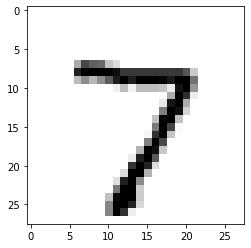

In [ ]:
# get wrong x_test predictions
predictions = model.predict(x_test)
for i in range(100):
    print(i)
    print('predicted : ',np.argmax(predictions[i]))
    print('answer : ' ,y_test[i])
plt.imshow(x_test[0], cmap=plt.cm.binary)

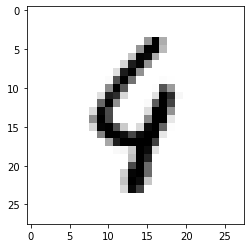

predicted :  9
weight :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
answer :  4


In [ ]:
new_predictions = predictions.argmax(axis = 1)
answer_sheet = new_predictions == y_test
for i in range(len(answer_sheet)):
    if answer_sheet[i] == False:
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        plt.show()
        print('predicted : ',np.argmax(predictions[i]))
        print('weight : ', np.round(predictions[i],2))
        print('answer : ' ,y_test[i])
        break

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (10, 10), activation='relu', input_shape=(28, 28, 1))

])
model2.set_weights(model.layers[0].get_weights())

313/313 [==============================] - 1s 3ms/step


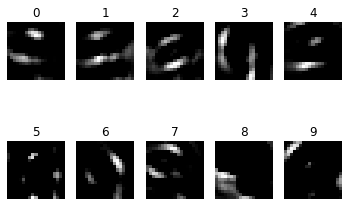

In [ ]:
output = model2.predict(x_test)
output[0].shape
for j in range(100):
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(output[j][:,:,i], cmap='gray')
        plt.title(i)
        plt.axis('off')